In [2]:
import os
os.chdir("..")

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import pickle
import json

import osmnx as ox

from pprint import pprint
from tqdm import tqdm

from data import get_data

## Let's just look at the first place for now

In [6]:
with open("./places.json") as fin:
    places = json.load(fin)

slug = "harvard"
placename, coords, slug = next(place for place in places if place[2] == slug)
print(placename, coords, slug)

G, adj, boba_gdf = get_data(slug)

Harvard [42.374194, -71.116608] harvard


In [7]:
nodes, edges = ox.graph_to_gdfs(G)

In [9]:
with open(f"./output/walk_trials/{slug}.pkl", "rb") as fin:
    walk_data = pickle.load(fin)

print(f"Have walk data for {len(walk_data)} starting points.")

random_start = list(walk_data.keys())[0]
print(f"Each starting point has {len(walk_data[random_start]['times'])} samples.")

Have walk data for 100 starting points.
Each starting point has 100 samples.


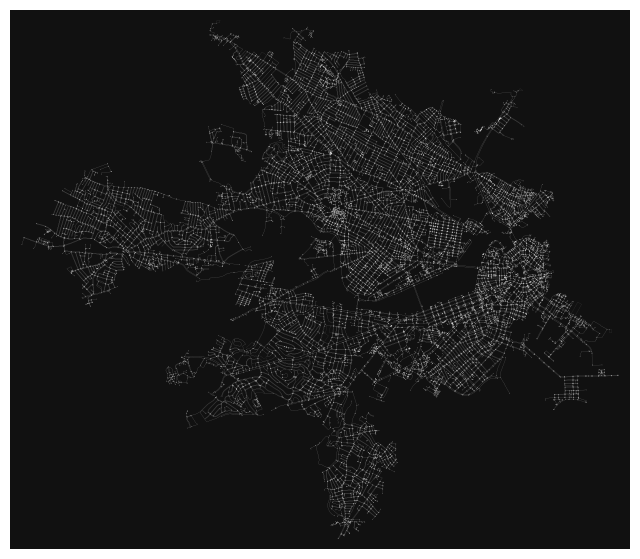

In [10]:
# Plot starting locations
fig, ax = ox.plot_graph(G, dpi=200, edge_linewidth=0.05, node_size=0.1, show=False)

In [ ]:
for start in walk_data.keys():
    lat, long = nodes.loc[start]["y"], nodes.loc[start]["x"]
    ax.plot(long, lat, "ro", markersize=0.5)

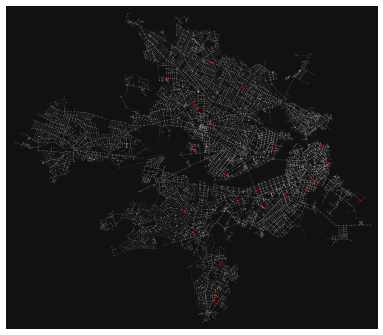

In [ ]:
fig

In [ ]:
prop_success = np.array([np.sum(np.array(walk["flags"]) == "success") for walk in walk_data.values()])
print(f"Proportion of successes: {np.mean(prop_success)}")